<a href="https://colab.research.google.com/github/JacobyNevada/ds_belhard/blob/main/hw5/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 Linear Regression
RMSE: 42164.85
MAE:  29668.17
R²:   0.755


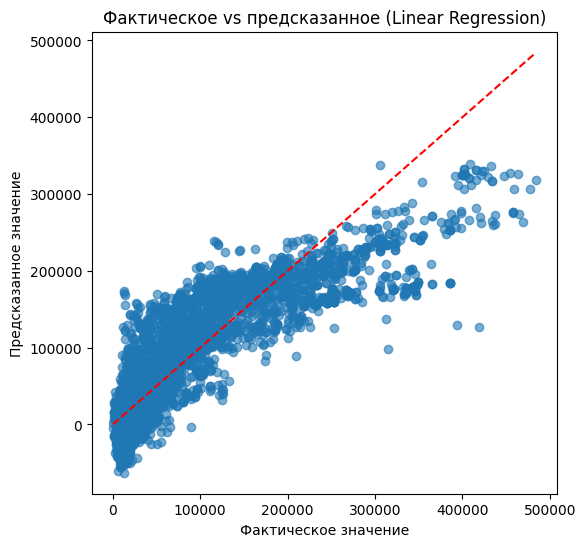


 Random Forest
RMSE: 8932.15
MAE:  3216.26
R²:   0.989


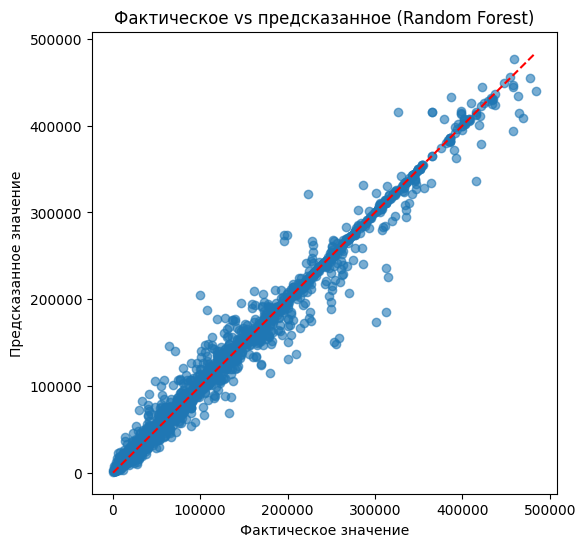


 Gradient Boosting
RMSE: 28747.84
MAE:  18286.32
R²:   0.886


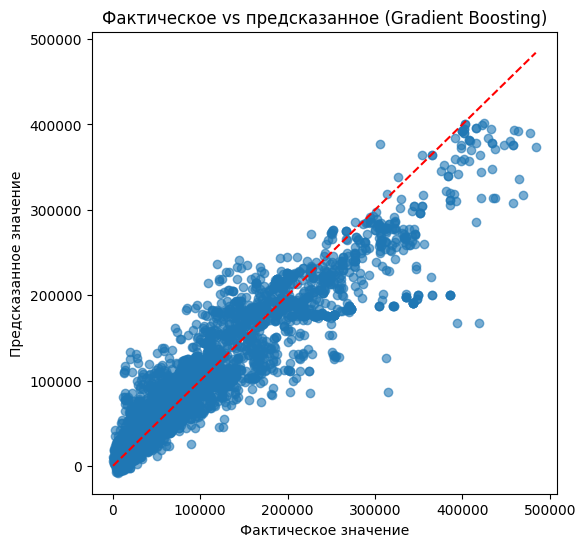


 XGBoost
RMSE: 21966.03
MAE:  13503.42
R²:   0.933


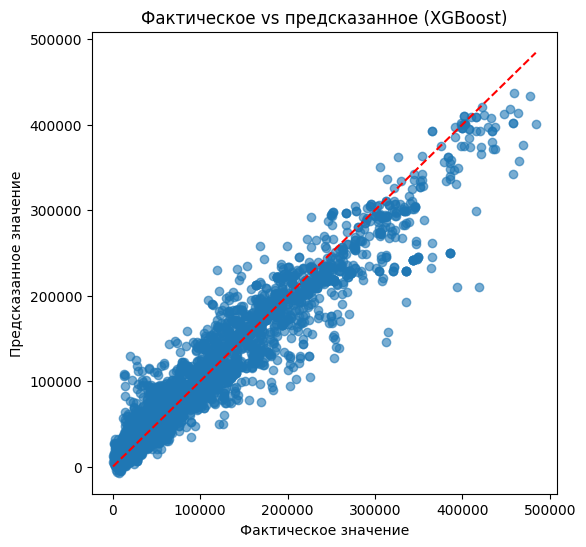


 K-Nearest Neighbors
RMSE: 66031.28
MAE:  41936.47
R²:   0.399


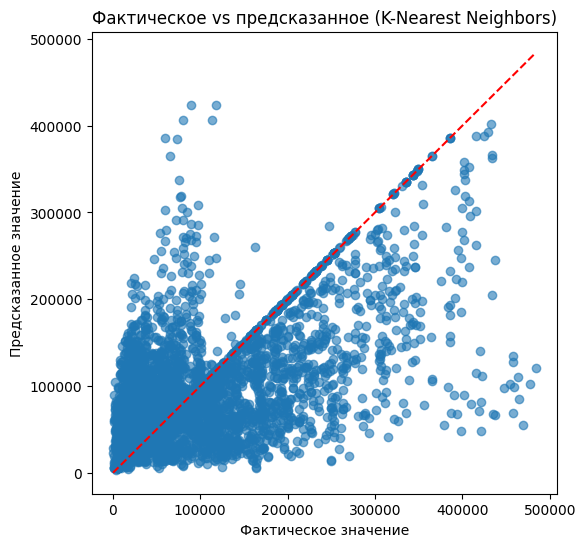

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

def evaluate_regression(df, model, model_name):
    df_encoded = pd.get_dummies(df, columns=["Area", "Item"], drop_first=True)

    X = df_encoded.drop(columns=["hg/ha_yield"])
    y = df_encoded["hg/ha_yield"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n {model_name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE:  {mae:.2f}")
    print(f"R²:   {r2:.3f}")

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        color="red",
        linestyle="--"
    )
    plt.xlabel("Фактическое значение")
    plt.ylabel("Предсказанное значение")
    plt.title(f"Фактическое vs предсказанное ({model_name})")
    plt.show()

##############################################3
# https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset
df = pd.read_csv("yield_df.csv")

evaluate_regression(df, LinearRegression(), "Linear Regression")
evaluate_regression(df, RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1), "Random Forest")
evaluate_regression(df, GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42), "Gradient Boosting")
evaluate_regression(df, XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42, n_jobs=-1), "XGBoost")
evaluate_regression(df, KNeighborsRegressor(n_neighbors=5, weights="distance", n_jobs=-1), "K-Nearest Neighbors")